In [1]:
%matplotlib inline

In [2]:
from matplotlib.ticker import ScalarFormatter
import numpy as np

In [3]:
from nengo_extras.plot_spikes import plot_spikes, preprocess_spikes

In [4]:
from cue.utils.plotting import *

In [5]:
style()

In [6]:
data = np.load('../../data/final/spikes.npz')

In [7]:
enc = data['m_tf_post_enc']

In [8]:
weights = np.einsum('kj,ijl', enc[::100], data['m_tf_weights'][:, -16:, ::400])

In [9]:
weights_flattened = weights.reshape((weights.shape[0], -1))

In [10]:
weights_flattened = np.sort(weights_flattened, axis=1)

In [11]:
stm_spikes = preprocess_spikes(
    data['t'], data['stm_spikes'],
    num=40, sample_size=200, sample_filter_width=.2, cluster_filter_width=0.1)

In [12]:
ctx_spikes = preprocess_spikes(
    data['t'], data['ctx_spikes'],
    num=40, sample_size=200, sample_filter_width=.2, cluster_filter_width=0.1)

In [13]:
vocab = spa.Vocabulary(data['vocab_vectors'].shape[1])
for k, v in zip(data['vocab_keys'], data['vocab_vectors']):
    vocab.add(k, v)

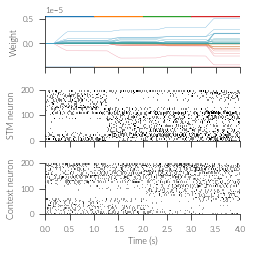

In [14]:
fig = plt.figure(figsize=(single_fig_size[0], 1.6 * row_height))

def_colors = sns.color_palette()
with sns.color_palette('husl', n_colors=int(1.5 * np.prod(weights_flattened.shape[1])), desat=0.8):
    ax2 = fig.add_subplot(3, 1, 1)
    ax2.plot(data['t'], weights_flattened, lw=0.3);
    ticker = ScalarFormatter()
    ticker.set_powerlimits((0, 0))
    ax2.yaxis.set_major_formatter(ticker)
    ax2.set_ylabel("Weight")
    
    ylim = ax2.get_ylim()
    for i, c in zip(range(4), def_colors):
        ax2.plot((i, i + 1),  2 * [ylim], c=c)
    ax2.set_ylim(ylim)

spike_extent = (data['t'][0], data['t'][-1], 0, 200)

ax3 = fig.add_subplot(3, 1, 2, sharex=ax2)
plot_spikes(*stm_spikes, contrast_scale=0.5, ax=ax3, extent=spike_extent)
ax3.set_ylabel("STM neuron")

ax4 = fig.add_subplot(3, 1, 3, sharex=ax3)
plot_spikes(*ctx_spikes, contrast_scale=0.5, ax=ax4, extent=spike_extent)
ax4.set_xlabel("Time (s)")
ax4.set_ylabel("Context neuron")

for ax in fig.axes:
    ax.label_outer()

sns.despine(fig)
fig.tight_layout()

In [15]:
save_tight_fig(fig, '../../../phd-thesis/figures/spikes.pdf', dpi=600)